# Loan Defaulter Case Study

**Problem Statement**

The company wants to reduce credit loss by identifying risky loan applicants. This involves understanding the driving factors behind loan default.
To address the business objectives outlined, we will conduct an Exploratory Data Analysis (EDA) to understand the driving factors behind loan default. This will involve identifying strong indicators of default by analyzing various variables related to borrowers and loans.

We are going to follow following five steps of EDA in two sections:
1. Data sourcing
2. Data cleaning
3. Univariate analysis
4. Bivariate analysis
5. Derived metrics




### Section 1 - Data Sourcing and Cleaning:

Obtain data related to borrowers, loans, and default status. Preprocess the data to handle missing values, outliers, and any inconsistencies.

In [1]:
#import the libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#read the dataset and check the first five rows
inp0 = pd.read_csv("loan.csv")
inp0.head(5)


C:\Users\MohammadUddin\AppData\Local\Temp\ipykernel_38456\211778474.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  inp0 = pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#Check the shape of the dataframe
inp0.shape

(39717, 111)

In [4]:
#Check info of the dataframe
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
#Check the datatypes of all the columns of the dataframe
inp0.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

#### Missing Value Treatment

In [6]:
#Check the number of null values in the columns
inp0.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
#Dropping Columns with more than 40 %percent of NULL values:
drop_cols=inp0.columns[inp0.isnull().sum()/inp0.shape[0]*100 > 40]
print("Original Shape: "+str(inp0.shape))
print("Count of drop Columns: "+str(len(drop_cols)))
inp0.drop(columns=drop_cols,axis=1,inplace=True)
print("New Shape: "+str(inp0.shape))


Original Shape: (39717, 111)
Count of drop Columns: 57
New Shape: (39717, 54)



As can be seen we have dropped 57 COLUMNS containing more than 40 percent of NULL values:

In [8]:
#We are going to do analysis on the basis of following columns only, So rest are droped
#['acc_now_delinq','addr_state', 'annual_inc','annual_inc_joint','application_type','avg_cur_bal','delinq_2yrs','emp_length','emp_title','grade','home_ownership','installment','int_rate','issue_d','loan_amnt','loan_status','mort_acc','purpose','term','tot_coll_amt','tot_cur_bal','verified_status_joint']
analysis_cols=['acc_now_delinq','addr_state', 'annual_inc','annual_inc_joint','application_type','avg_cur_bal','delinq_2yrs','emp_length','emp_title','grade','home_ownership','installment','int_rate','issue_d','loan_amnt','loan_status','mort_acc','purpose','term','tot_coll_amt','tot_cur_bal','verified_status_joint']
drop_these = list(set(list(inp0)) - set(analysis_cols))
inp0 = inp0.drop(drop_these, axis = 1)


In [9]:
#Shape after only analysis columns are left
print(inp0.shape)

(39717, 16)


In [10]:
#Drop the rows having null values in the loan_status field
inp1 = inp0[ ~inp0.loan_status.isnull()]

#Check the shape of the dataframe
inp1.shape

(39717, 16)

In [11]:
#Check the number of nulls in the dataframe again
inp1.isnull().sum()


loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
emp_title           2459
emp_length          1075
home_ownership         0
annual_inc             0
issue_d                0
loan_status            0
purpose                0
addr_state             0
delinq_2yrs            0
application_type       0
acc_now_delinq         0
dtype: int64

Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [12]:
#We will keep the data as it is


#### Handling Incorrect Data Types 

In [13]:
#Check the datatypes of all the columns 
inp1.dtypes

loan_amnt             int64
term                 object
int_rate             object
installment         float64
grade                object
emp_title            object
emp_length           object
home_ownership       object
annual_inc          float64
issue_d              object
loan_status          object
purpose              object
addr_state           object
delinq_2yrs           int64
application_type     object
acc_now_delinq        int64
dtype: object

In [14]:
#Write the function to make the changes
inp1.int_rate = inp1.int_rate.apply(lambda x: 0 if x == '0' else float(x[:-1]))
inp1.term = inp1.term.apply(lambda x: 0 if x == '0' else int(x[:-6]))


In [15]:
#Analyse the Reviews column
inp1.dtypes

loan_amnt             int64
term                  int64
int_rate            float64
installment         float64
grade                object
emp_title            object
emp_length           object
home_ownership       object
annual_inc          float64
issue_d              object
loan_status          object
purpose              object
addr_state           object
delinq_2yrs           int64
application_type     object
acc_now_delinq        int64
dtype: object

### Sescion 2: Univariate, Bivariate, and Derived metrics analysis


#### 1.Univariate Analysis: 

Examine individual variables to understand their distributions, central tendencies, and outliers. This will help identify potential predictors of default.

Results:
   -  From the distribution of home ownership plot, we can understand "Rent" and Mortgage" categories are mostly provided the loan.
   -  From the distribution of loan purpose plot, we can understand debt consolidation high purpose for loan applying.
   -  From the distribution of loan term plot, we can understand 6 years loan higher in count.
   -  From the distribution of loan Issue date plot, we can understand there is increase in applicant receiving by the months.
   -  From the distribution of loan status plot, we can understand there are high number of applicate have already paid their loan.
   -  From the spread of loan amount, we can see median is around 10000
   -  From the spread of annual income, we can see there are two outliers


a.)Unordered Categorical Variables

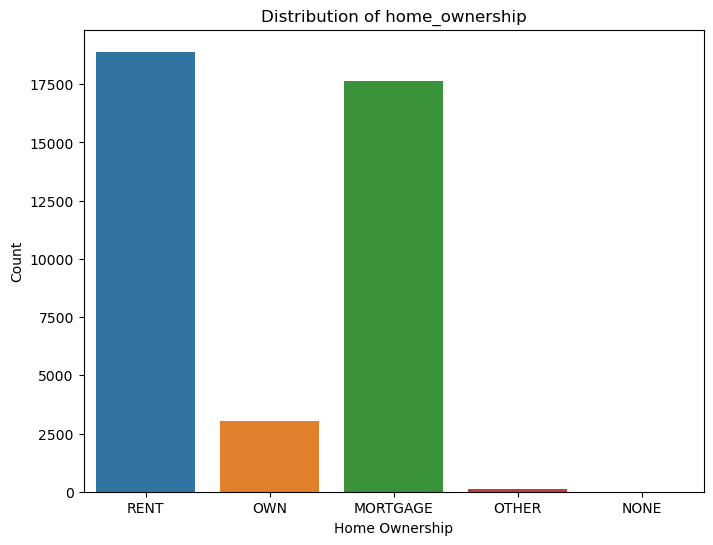

In [16]:
#Distribution of home_ownership
plt.figure(figsize=(8, 6))
sns.countplot(x='home_ownership', data=inp1)
plt.title('Distribution of home_ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()

From the distribution of home ownership plot, we can understand "Rent" and Mortgage" categories are mostly provided the loan.

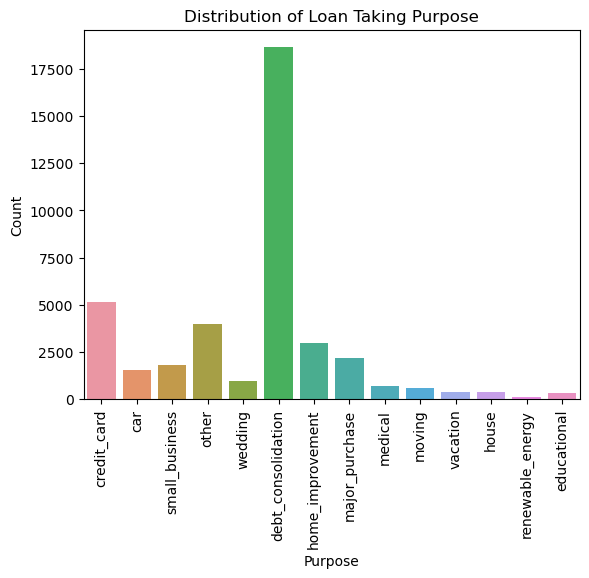

In [17]:
#Distribution of loan taking purpose
sns.countplot(x='purpose', data=inp1)
plt.title('Distribution of Loan Taking Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

From the distribution of loan purpose plot, we can understand debt consolidation high purpose for loan applying.

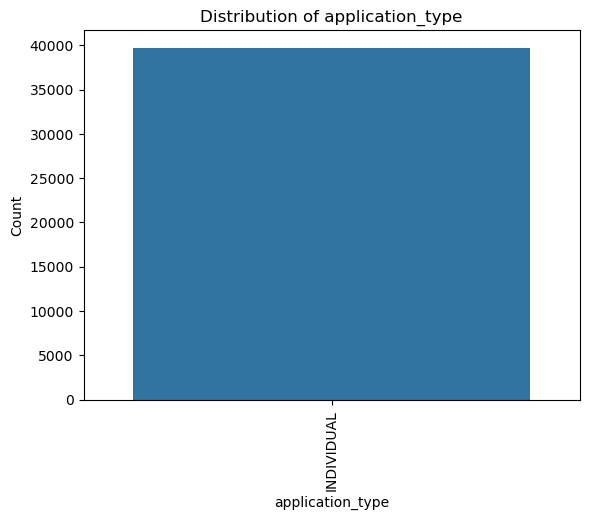

In [18]:
#Distribution of loan based on the application type
sns.countplot(x='application_type', data=inp1)
plt.title('Distribution of application_type')
plt.xlabel('application_type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

From the distribution of loan based on the application type plot, we can understand there is only one type of applicant received the loan

b.Ordered Categorical Variables

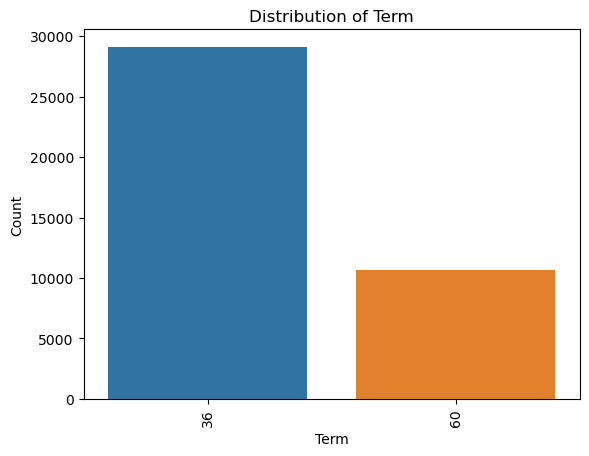

In [19]:
#Distribution of loan based term
sns.countplot(x='term', data=inp1)
plt.title('Distribution of Term')
plt.xlabel('Term')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

From the distribution of loan term plot, we can understand 6 years loan higher in count.


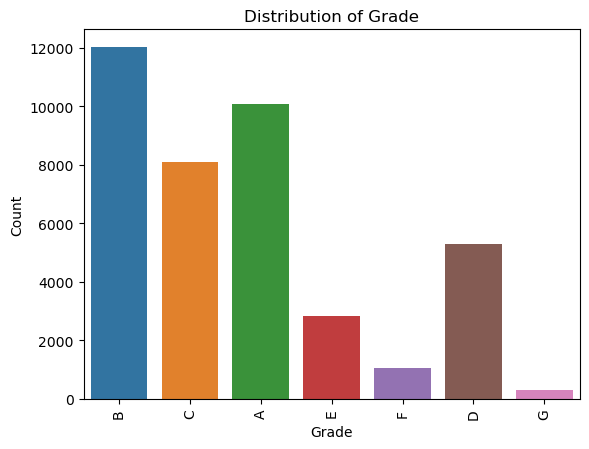

In [20]:
#Distribution of loan based grade
sns.countplot(x='grade', data=inp1)
plt.title('Distribution of Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

From the distribution of loan based on the grade plot, we can understand grade A, B, C applicant received the loan are more.

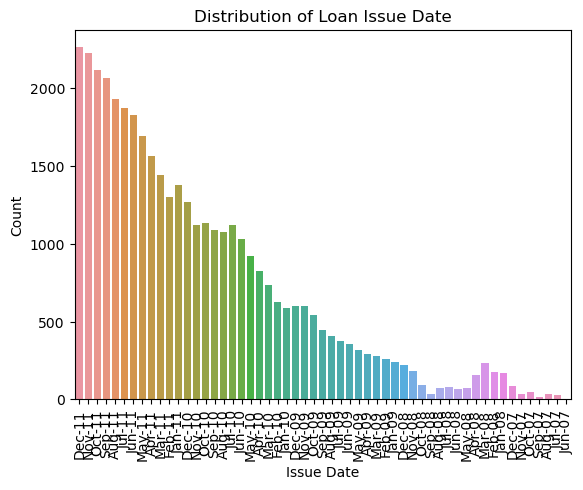

In [21]:
#Distribution of loan Issue Date
sns.countplot(x='issue_d', data=inp1)
plt.title('Distribution of Loan Issue Date')
plt.xlabel('Issue Date')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

From the distribution of loan Issue date plot, we can understand there is increase in applicant receiving by the months.


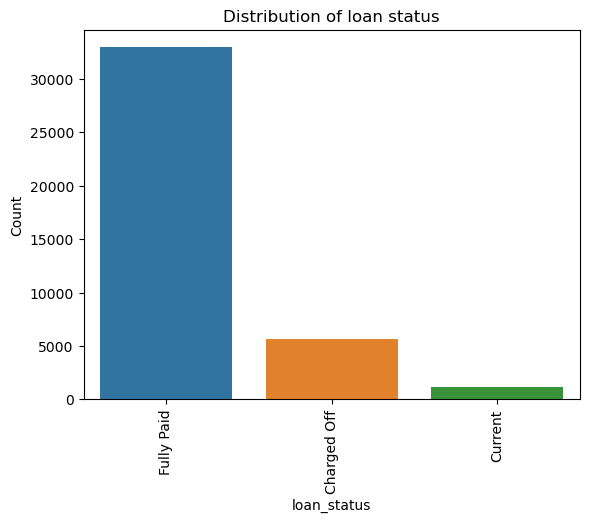

In [22]:
#Distribution of loan Status
sns.countplot(x='loan_status', data=inp1)
plt.title('Distribution of loan status')
plt.xlabel('loan_status')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

From the distribution of loan status plot, we can understand there are high number of applicate have already paid their loan.

c.)Quantitative Variables


<Axes: >

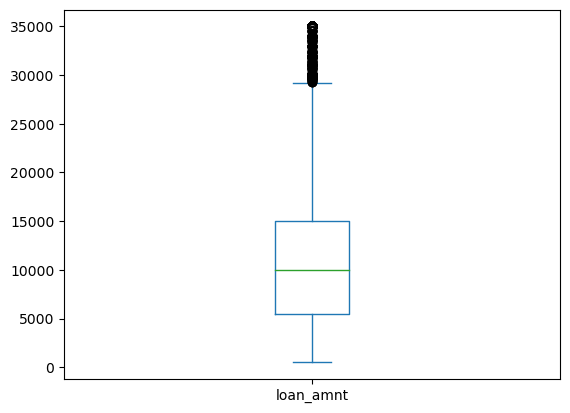

In [23]:
#Spread of loan amount
inp1.loan_amnt.plot.box()

From the spread of loan amount we can see median is around 10000

<Axes: >

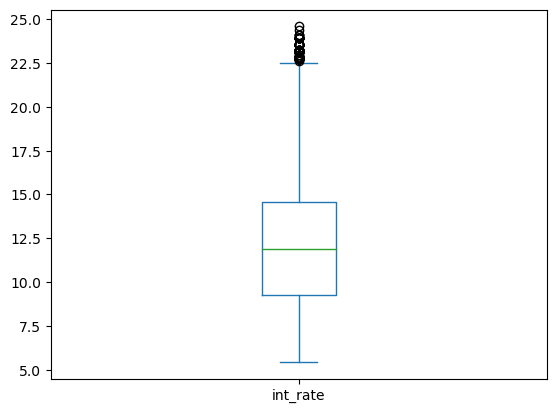

In [24]:
#Spread of loan interest Rate
inp1.int_rate.plot.box()

From the spread of loan interest rate we can see median is between 12.5% to 10%


<Axes: >

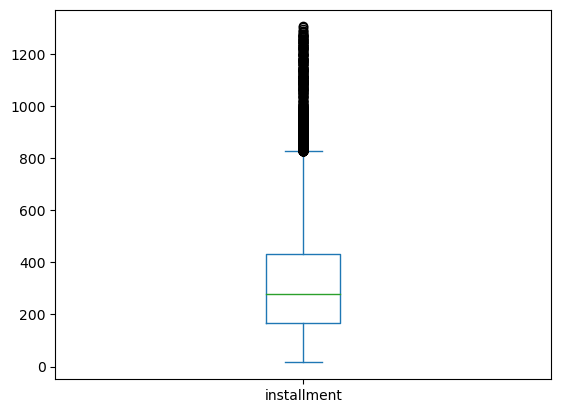

In [25]:
#Spread of loan Installment
inp1.installment.plot.box()

From the spread of loan installment, we can see median is between 200 to 400

<Axes: >

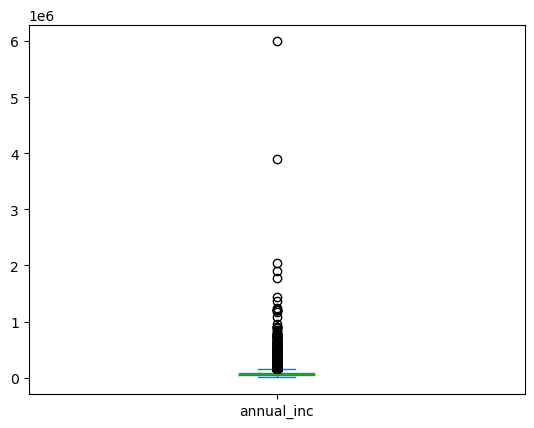

In [26]:
#Spread of annual income
inp1.annual_inc.plot.box()

From the spread of annual income, we can see there are two outliers


#### 2.Segmented Univariates

Result: 
   -  From the applicant years of employment, It is clearly visible avg income has increased


C:\Users\MohammadUddin\AppData\Local\Temp\ipykernel_38456\2714440347.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp2['emp_years'] = inp2.emp_years.apply(lambda x: int(x))


<Axes: xlabel='emp_years'>

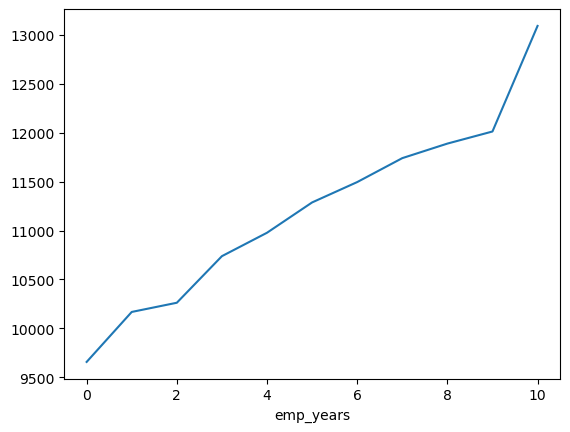

In [27]:
#Trend in applicatant years of employment with there income
inp1['emp_years'] = inp1.emp_length.apply(lambda x: '0' if x == '< 1 year' else x)
inp1['emp_years'] = inp1.emp_years.apply(lambda x: '1' if x == '1 year' else x)
inp1['emp_years'] = inp1.emp_years.apply(lambda x: '10' if x == '10+ years' else x)
inp1['emp_years'] = inp1.emp_years.apply(lambda x: str(x)[:2])
inp1['emp_years'] = inp1.emp_years.apply(lambda x: x.strip())
inp2 = inp1[inp1['emp_years'] != 'na']
inp2['emp_years'] = inp2.emp_years.apply(lambda x: int(x))
inp2.groupby(by='emp_years')['loan_amnt'].mean().plot()

From the applicatant years of employement, It is crearly visible avg income has increased

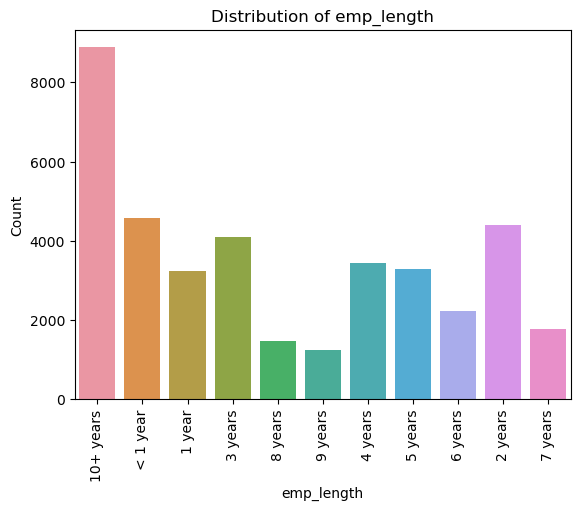

In [28]:
#Distribution of emp_length
sns.countplot(x='emp_length', data=inp1)
plt.title('Distribution of emp_length')
plt.xlabel('emp_length')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


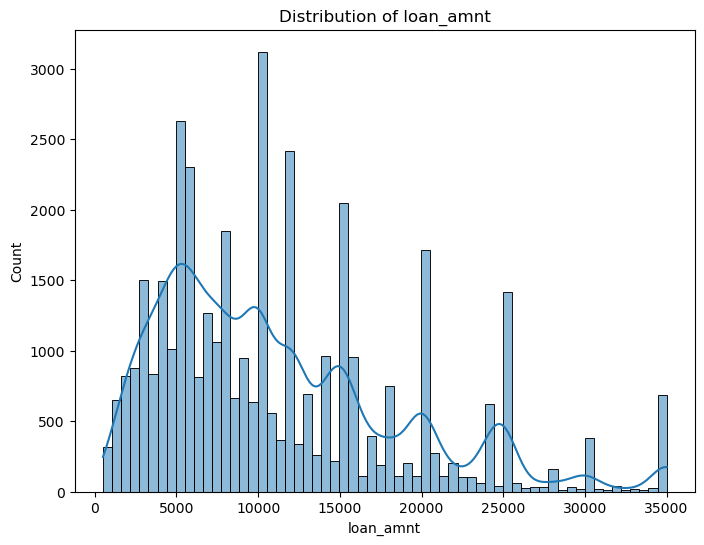

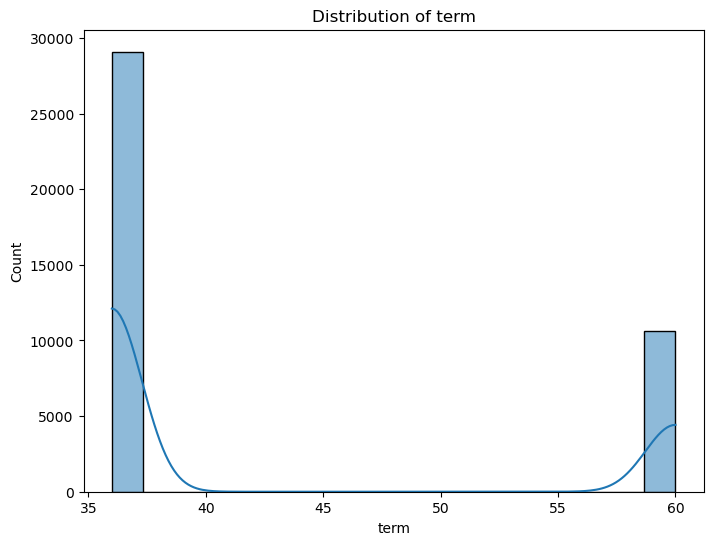

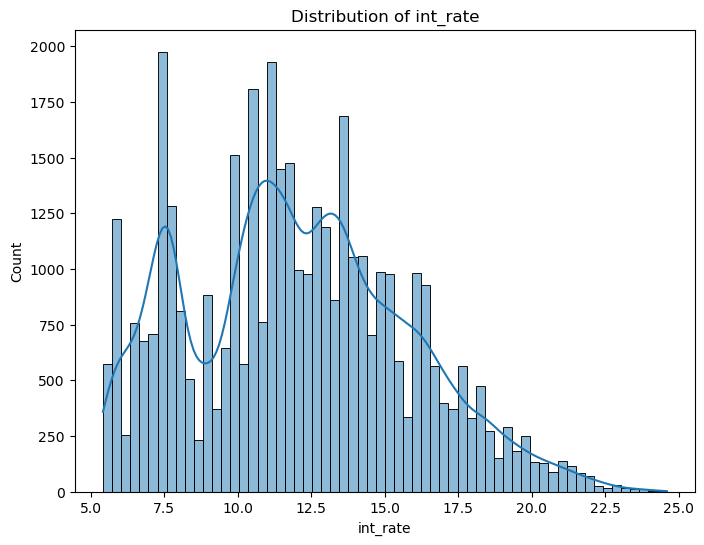

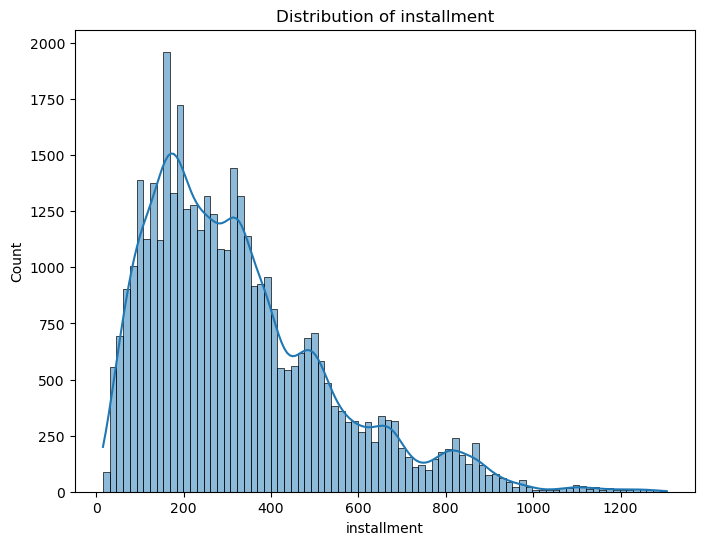

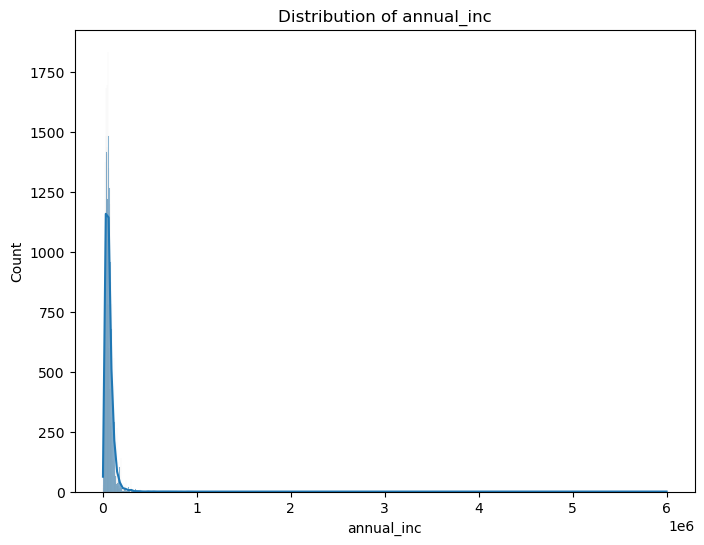

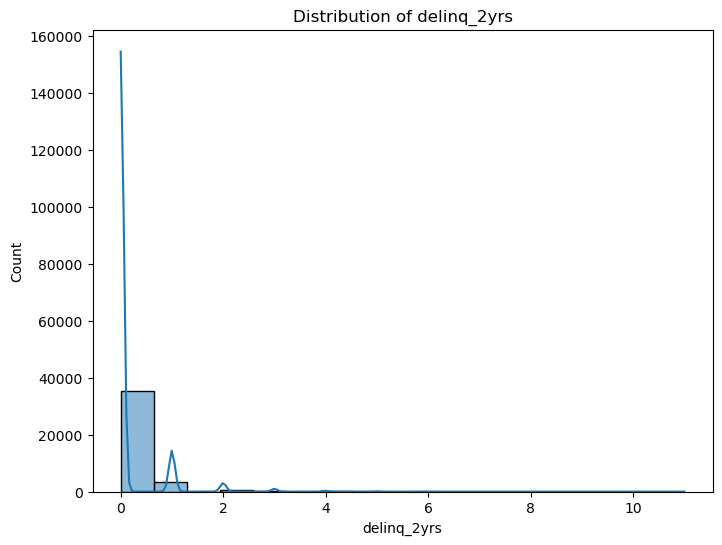

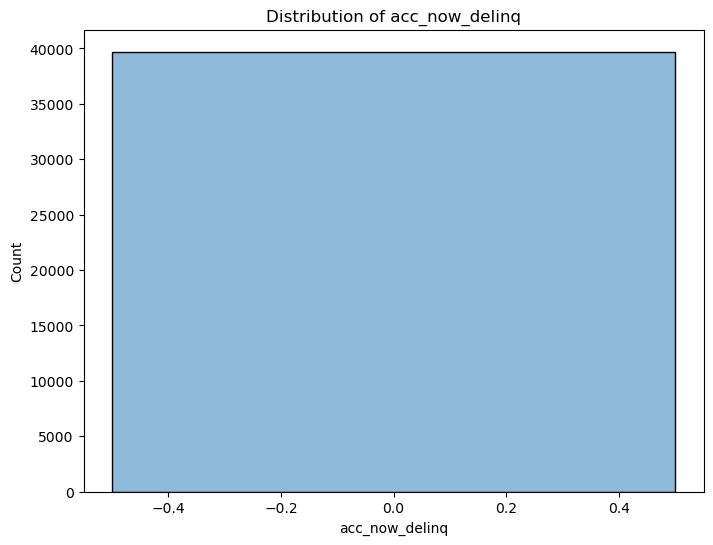

In [29]:
numerical_cols = inp1.select_dtypes(include=np.number).columns.tolist()
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(inp1[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

#### 3.Bivariate Analysis

Results:
   -  High loan amount are more defaulter 
   -  High Interest rate is more defaulter 
   -  High Installment are more defaulter 
   -  Higher term are more defaulter
   -  9 years employment is less defaulter. 
   -  Mortgage ownership is less defaulter. 
   -  Small business are more defaulter
   -  Defaulter trend has changed from higher to lower to higher again with passing months.

In [30]:
#New column is created as LoanS, loan Status with value Non Defaulter which contain both Fully Paid or Current and Defaulter as Charge off
inp1['loanS'] = inp1.loan_status.apply(lambda x: 'Fully Paid' if x == 'Current' else x)
inp1['loanS'] = inp1.loanS.apply(lambda x: 'Non Defaulter' if x == 'Fully Paid' else 'Defaulter')


1.Continous Variables

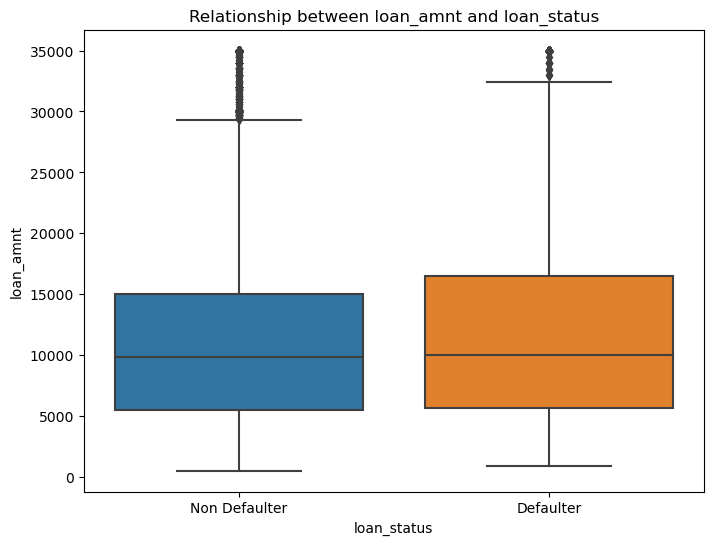

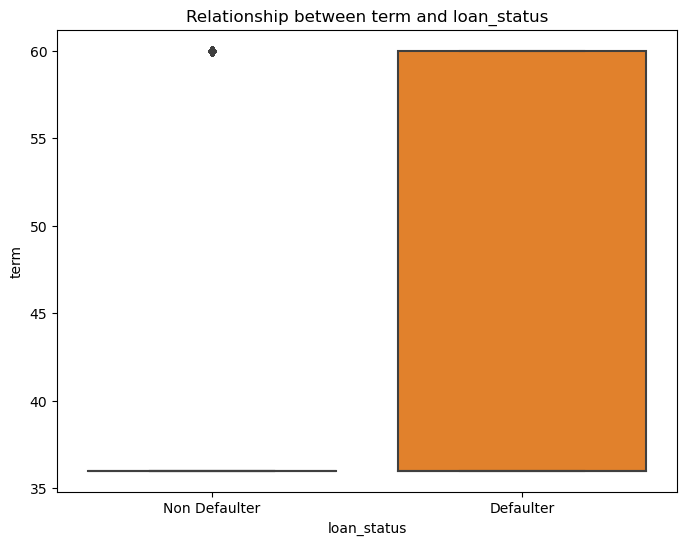

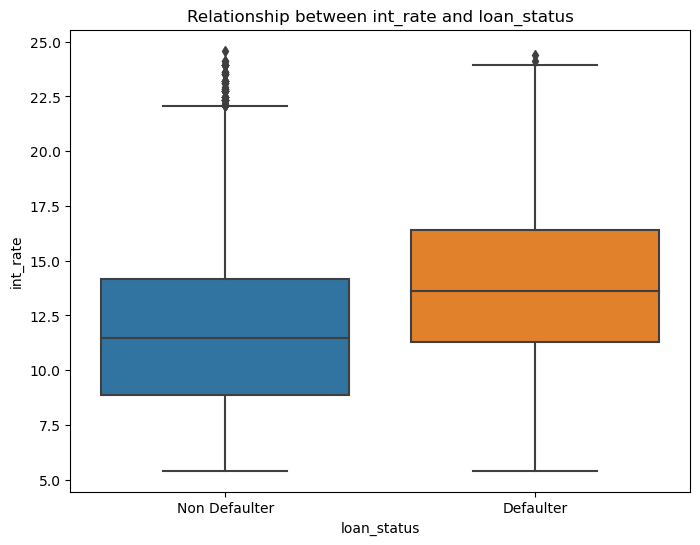

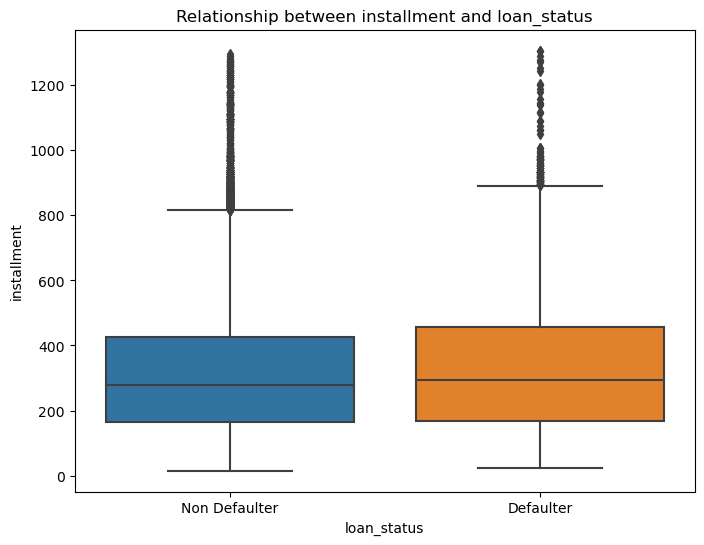

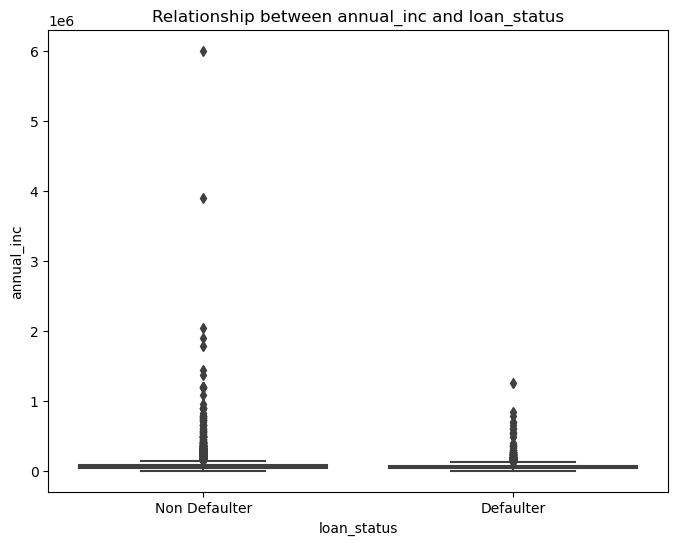

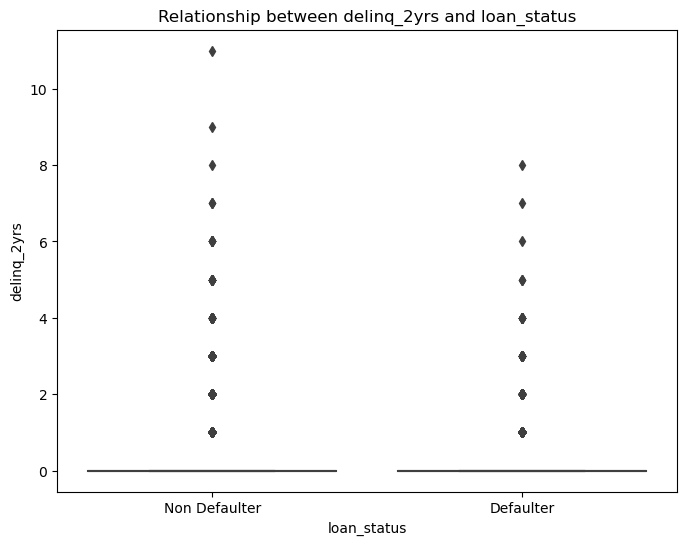

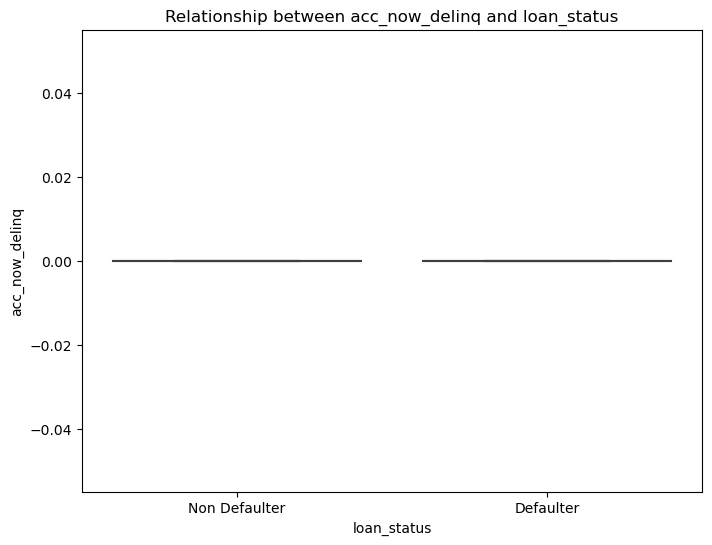

In [31]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='loanS', y=col, data=inp1)
    plt.title(f'Relationship between {col} and loan_status')
    plt.xlabel('loan_status')
    plt.ylabel(col)
    plt.show()

2.Categorical Variables

Results:
   -  9 years employment is less defaulter. 
   -  Mortgage ownership is less defaulter. 
   -  Small business are more defaulter
   -  Defaulter trend has changed from higher to lower to higher again with passing months.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


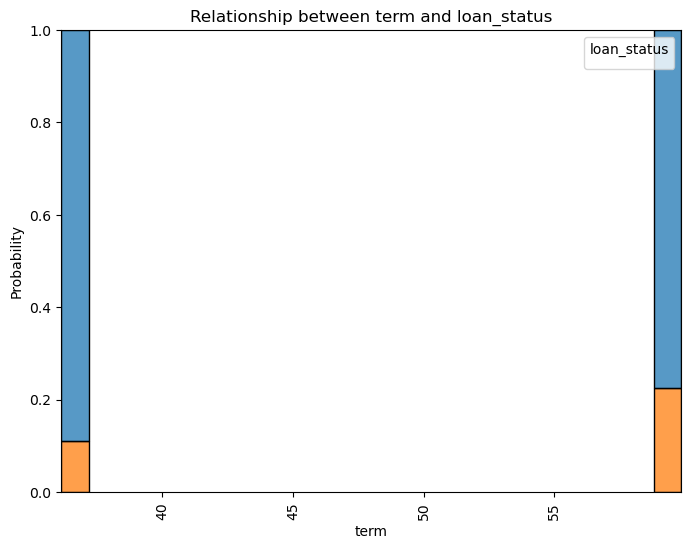

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


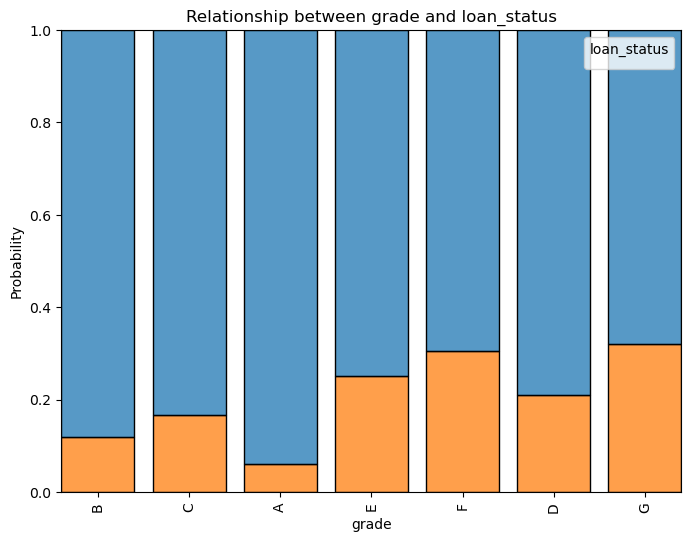

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


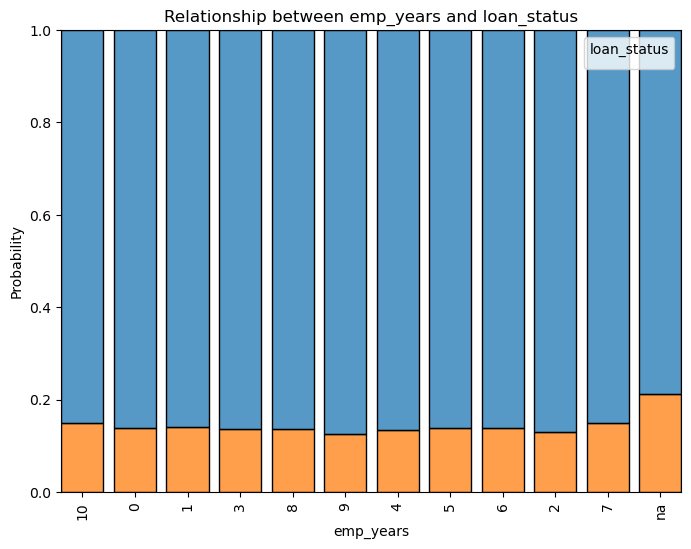

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


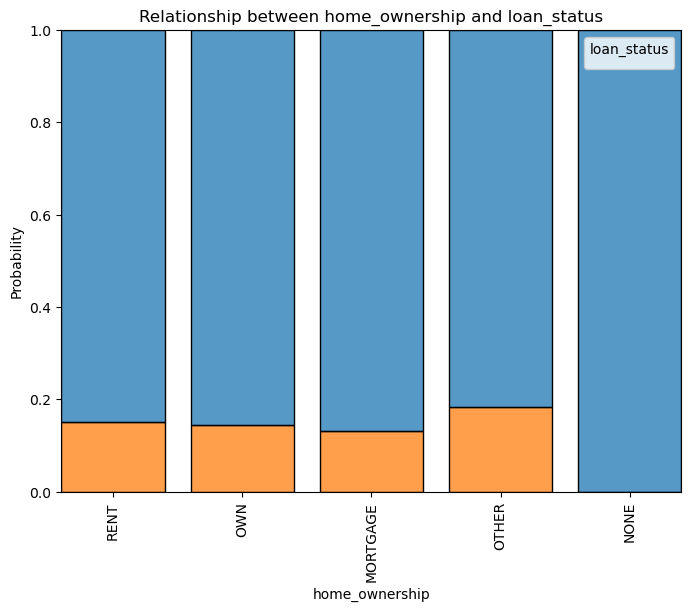

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


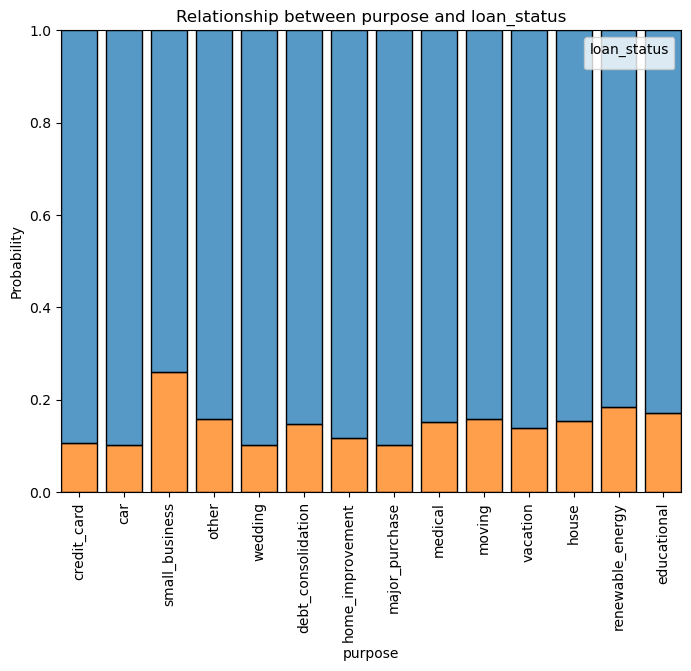

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


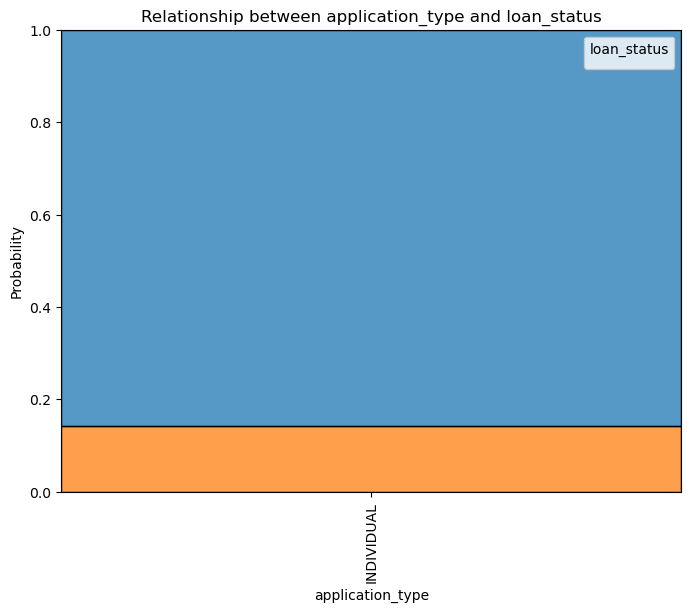

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


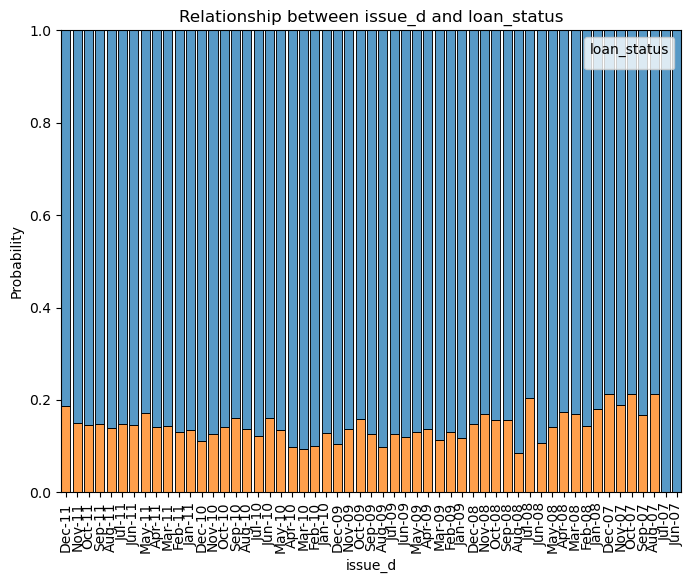

In [32]:
#Probability graph
categorical_cols = list(['term', 'grade', 'emp_years', 'home_ownership', 'purpose', 'application_type', 'issue_d'])
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    #sns.countplot(x=col, hue='loanS', data=inp1)
    sns.histplot(inp1, x=col, hue="loanS", stat="probability", multiple="fill", shrink=.8)
    plt.title(f'Relationship between {col} and loan_status')
    plt.xlabel(col)
    plt.ylabel('Probability')
    plt.legend(title='loan_status', loc='upper right')
    plt.xticks(rotation=90)
    plt.show()

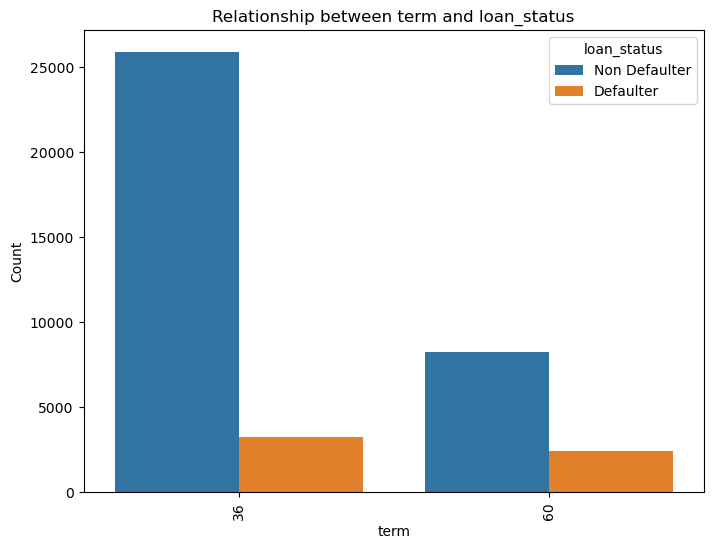

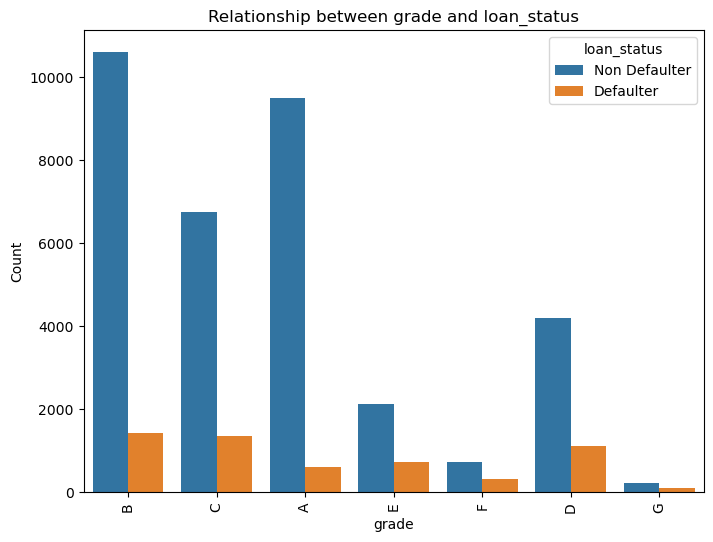

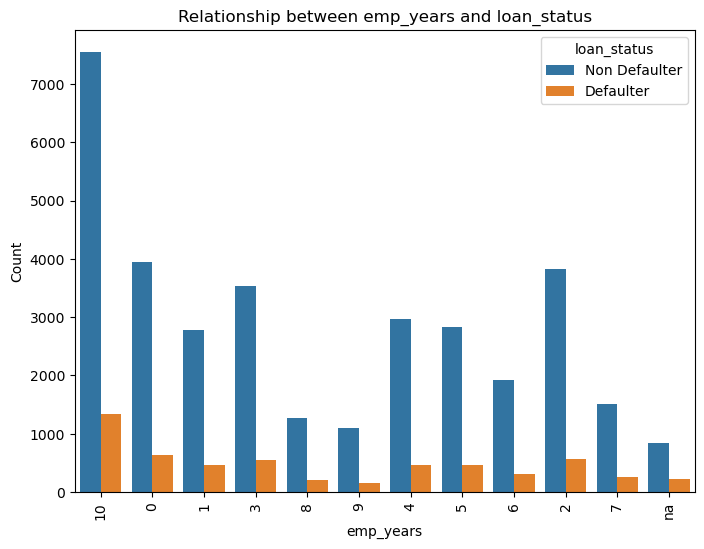

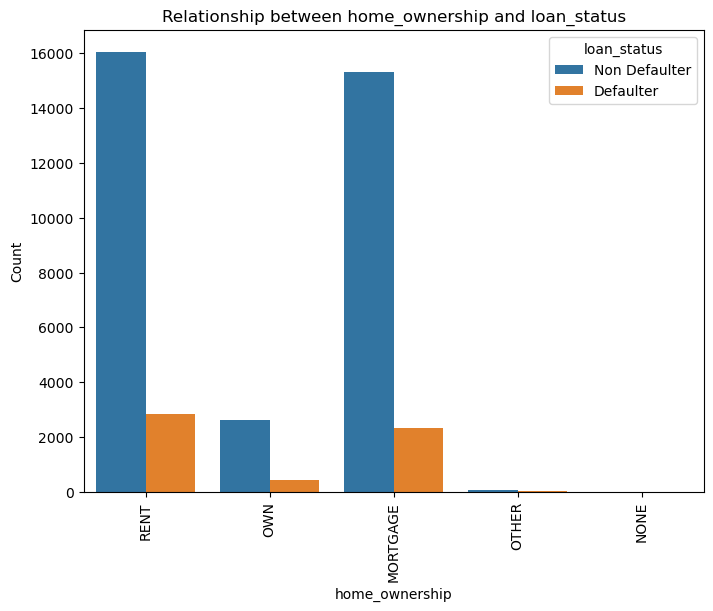

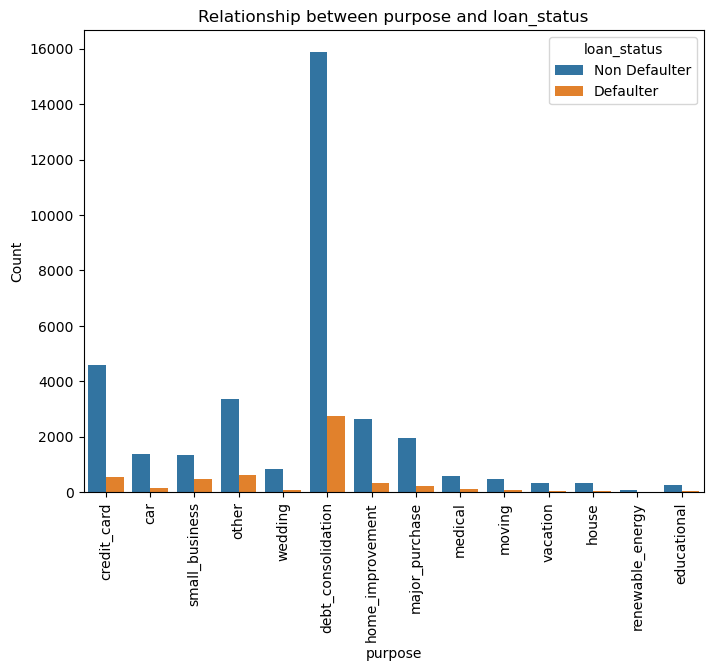

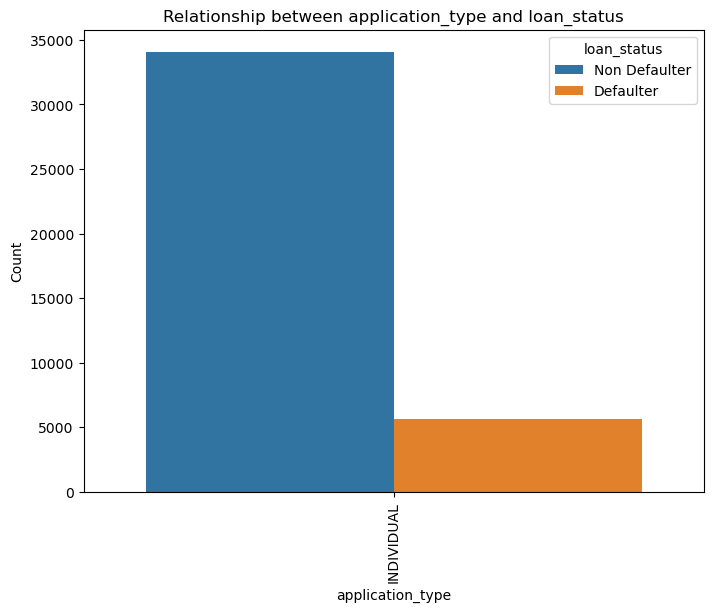

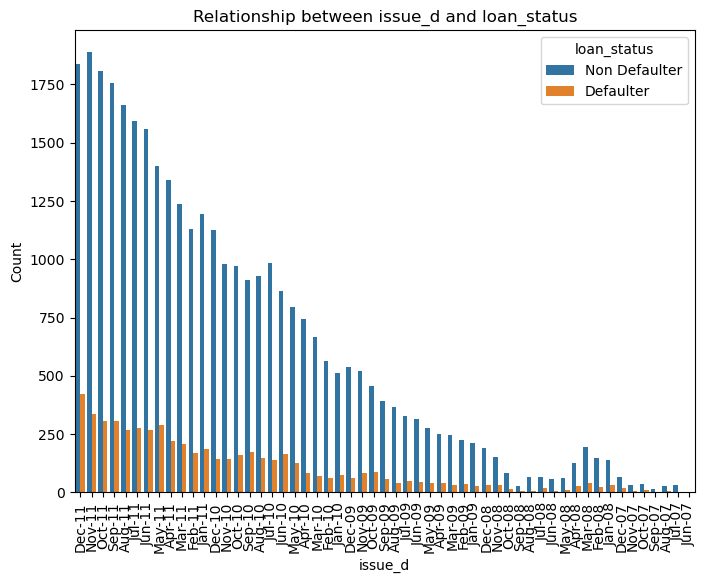

In [33]:
categorical_cols = list(['term', 'grade', 'emp_years', 'home_ownership', 'purpose', 'application_type', 'issue_d'])
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='loanS', data=inp1)
    plt.title(f'Relationship between {col} and loan_status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='loan_status', loc='upper right')
    plt.xticks(rotation=90)
    plt.show()

#Derived Metrics


1.Type Driven

Results:
   -  In the year 2007 Probability of defaulter is higher as compare to other years. 

In [34]:
#New field year is added to group the loan per years basis.
inp1['year'] = inp1.issue_d.apply(lambda x: 0 if x == '0' else float(x[-2:]))

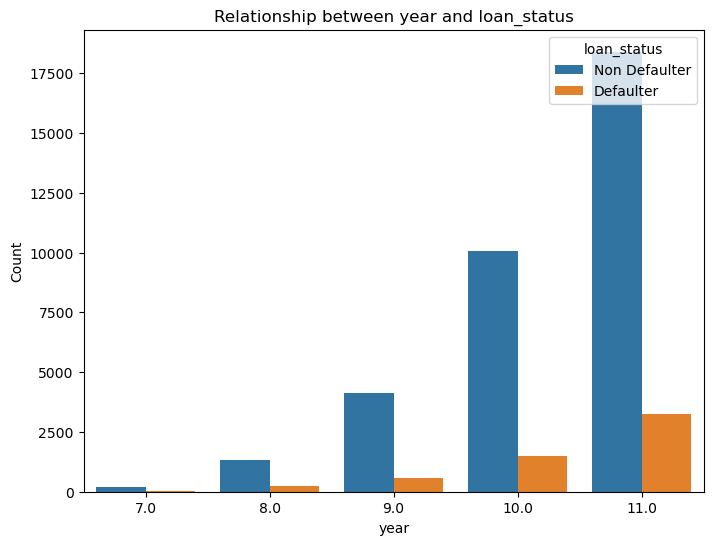

In [35]:
categorical_cols = list(['year'])
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='loanS', data=inp1)
    plt.title(f'Relationship between {col} and loan_status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='loan_status', loc='upper right')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


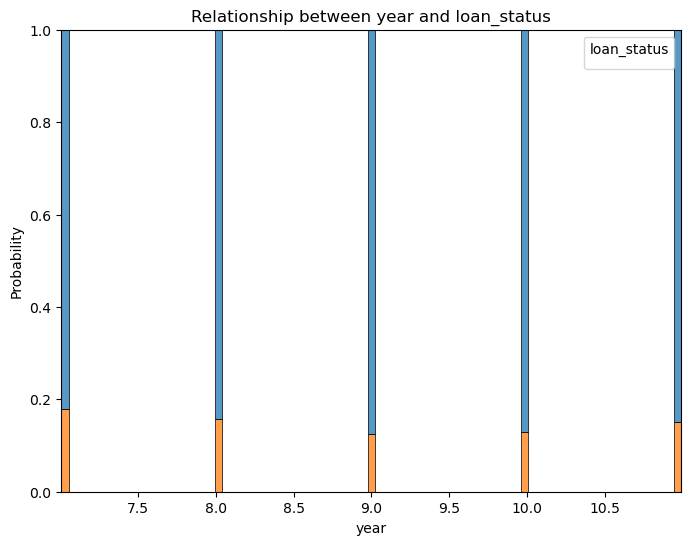

In [36]:
categorical_cols = list(['year'])
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(inp1, x=col, hue="loanS", stat="probability", multiple="fill", shrink=.8)
    plt.title(f'Relationship between {col} and loan_status')
    plt.xlabel(col)
    plt.ylabel('Probability')
    plt.legend(title='loan_status', loc='upper right')
    plt.show()


### With the analysis above it can be concluded that, Purpose of loan, ownership of applicant, term of loan, income of the applicant and employment years are the strong factors whether it will be defaulted or not.